#Data Visualization in Python using Matplotlib

##Step-by-step guide — Visualizing the Iris dataset

###1) Setup: install & import

Goal: Get all libraries for Data Wrangling and Visualization
You'll need pandas for data manipulation, matplotlib.pyplot for plotting, numpy to convert target array to categorical list and sklearn.datasets to easily load the Iris dataset.

In [1]:
# (if needed)
# pip install matplotlib seaborn pandas numpy

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

# only in Jupyter
%matplotlib inline

###2) Prepare the Iris dataset

Goal: load data as a DataFrame.

The load_iris() function returns a Bunch object, which we'll convert into a Pandas DataFrame for easier manipulation and plotting. We also add the species names as a separate column.

In [2]:
# Load the dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) as a column. The target is an array of 0s, 1s, and 2s.
# We map these to the actual species names (Setosa, Versicolor, Virginica).
df['species'] = pd.Series(iris.target).apply(lambda x: iris.target_names[x])


###3) Quick data check (inspect)

Goal: understand columns, types, missing values, basic stats.

| Step	| Purpose |
| --- | --- |
| head()	| Shows the first 5 rows for a quick preview of the dataset. |
| info()	| Provides data types, memory usage, and non-null counts. |
| describe()	| Displays summary statistics (mean, std, min, max, etc.). |
| isnull().sum()	| Checks for any missing values. |
| unique()	| Confirms the unique class labels (species names). |

In [3]:
# Display the first few rows to verify
print("🔹 First 5 Rows:")
print(df.head(), "\n")
print("🔹 Dataset Shape:")
print(df.shape, "\n")

🔹 First 5 Rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   

🔹 Dataset Shape:
(150, 5) 



In [ ]:

#Display data type
print("🔹 Dataset Info:")
print(df.info(), "\n")

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None 



In [5]:
print("🔹 Summary Statistics:")
print(df.describe(), "\n")

🔹 Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000   



In [6]:
#Check for any missing values
print("🔹 Missing Values:")
print(df.isnull().sum(), "\n")

🔹 Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64 



In [7]:
#Display unique class labels
print("🔹 Unique Species:")
print(df['species'].unique())

🔹 Unique Species:
[np.str_('setosa') np.str_('versicolor') np.str_('virginica')]


##4) Separate Data by Species

Goal: Classify species of Iris Flower for comparasion
Since the dataset contains three species, for comparision we first filter the DataFrame into three separate ones.

In [8]:
# Filter dataframes for each species
setosa = df[df['species'] == 'setosa']
versicolor = df[df['species'] == 'versicolor']
virginica = df[df['species'] == 'virginica']

##5) Visualize distribution of Single variable — Histogram

Goal: see distribution of petal_length.

Histograms are helpful for visualizing the distribution of a single feature across all species. We'll start by examining the sepal length distribution.

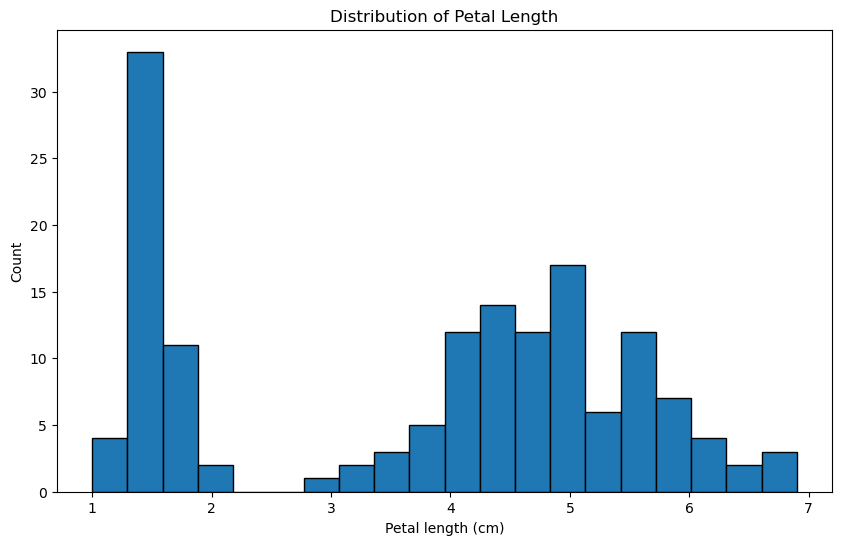

In [9]:
#Prepare Histogram of Petal Length
plt.figure(figsize=(10,6))
plt.hist(df['petal length (cm)'], bins=20, edgecolor='black')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal length (cm)')
plt.ylabel('Count')
plt.show()

#Similarly we can prepare Histogram of Petal Width, Sepal Length and Sepal Width

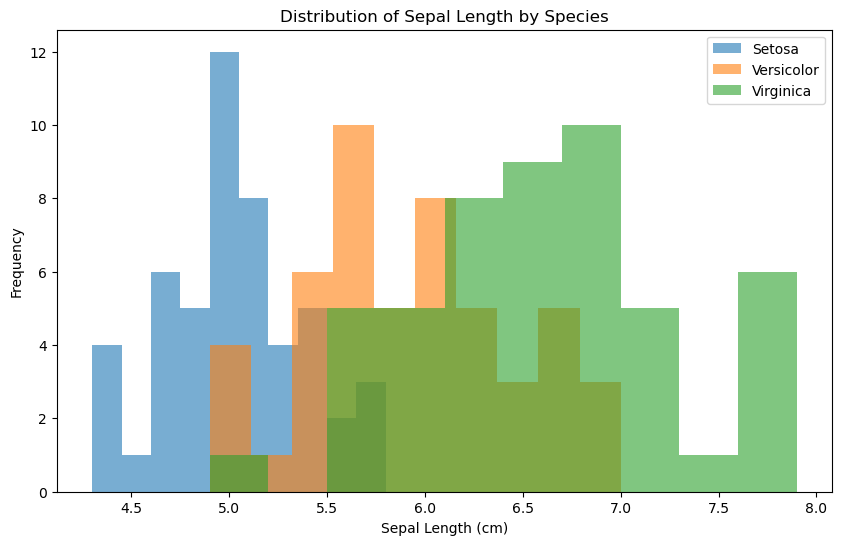

In [10]:
#Prepare Histogram of Sepal Length of all three species
plt.figure(figsize=(10, 6))

# Plot histograms for 'sepal length (cm)' for each species
plt.hist(setosa['sepal length (cm)'], bins=10, alpha=0.6, label='Setosa')
plt.hist(versicolor['sepal length (cm)'], bins=10, alpha=0.6, label='Versicolor')
plt.hist(virginica['sepal length (cm)'], bins=10, alpha=0.6, label='Virginica')

# Set plot title and labels
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.show()

###Group Histogram:

Python allows to display histogram of all numeric data from the dataframe

C:\Users\jpdob\AppData\Local\Temp\ipykernel_384024\668582404.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax = df.hist(


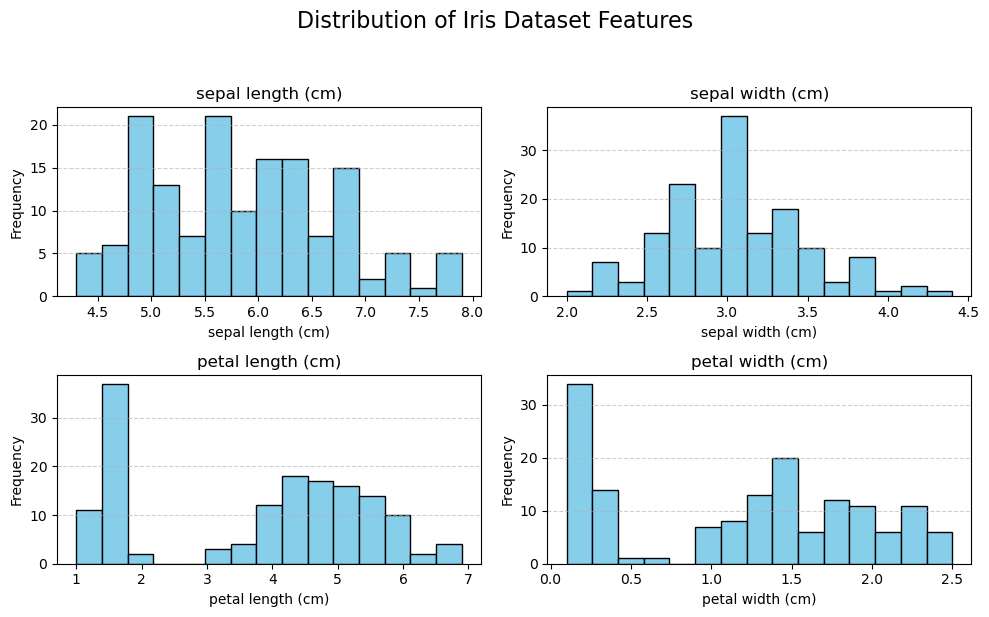

In [11]:
# 1. Setup the figure size and call df.hist
fig = plt.figure(figsize=(10, 6))

# df.hist returns an array of axes objects.
# We use fig.gca() to ensure it plots on the existing figure.
ax = df.hist(
    edgecolor='black',
    linewidth=1,
    ax=fig.gca(),
    bins=15,          # Specify the number of bins for detail
    grid=False        # Disable default pandas grid to customize later
)

# 2. Add an overall title
fig.suptitle('Distribution of Iris Dataset Features', fontsize=16, y=1.02)

# 3. Iterate through all subplots to apply styling
# We flatten the array of axes for easy iteration (it's a 2x2 grid)
for subplot in ax.flatten():
    # Set y-axis grid lines for readability
    subplot.grid(axis='y', linestyle='--', alpha=0.6)

    # Customizing Axes Labels
    feature_name = subplot.get_title()
    # Clean up the title/label for a professional look
    subplot.set_xlabel(f"{feature_name.replace(' (cm)', '')} (cm)", fontsize=10)
    subplot.set_ylabel("Frequency", fontsize=10)

    # Customize histogram color (using a light blue)
    for patch in subplot.patches:
        patch.set_facecolor('skyblue')


# 4. Adjust layout for perfect fit
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust rect to account for suptitle

plt.show()
plt.savefig('beautified_df_hist.png')

<Figure size 640x480 with 0 Axes>

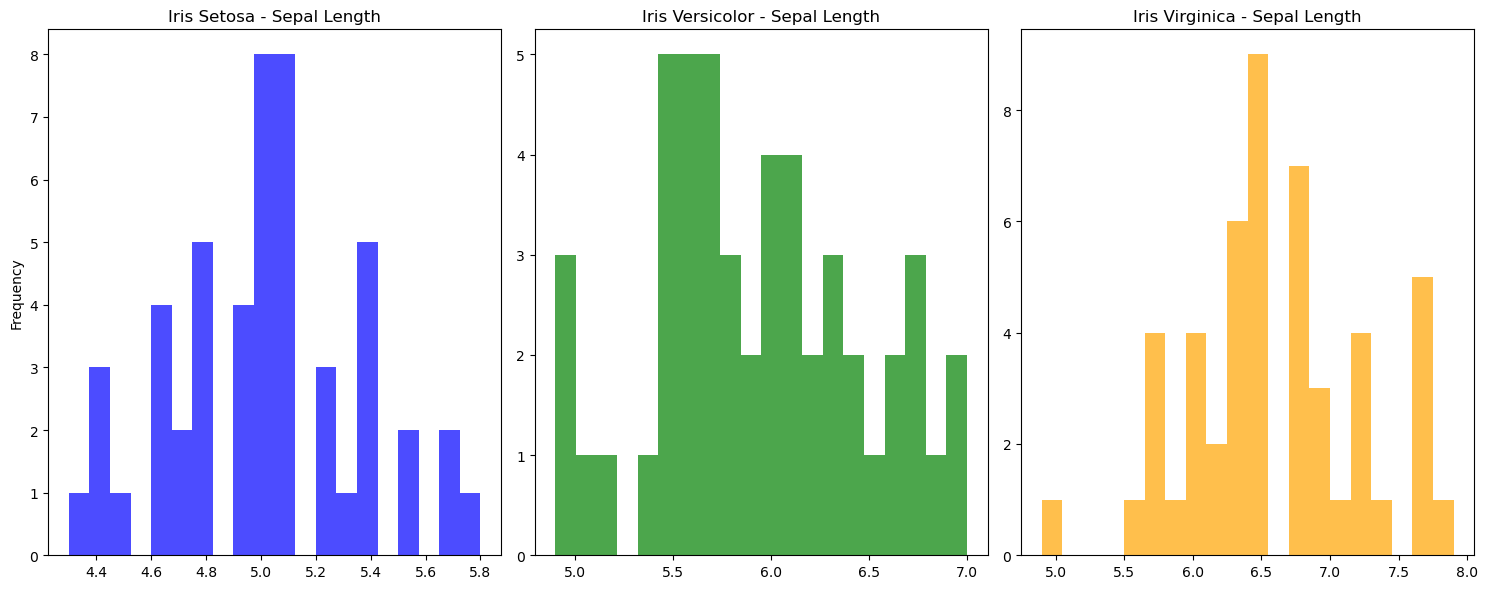

In [12]:
# Create subplots with one row and three columns for Sepal Length
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Plot histograms on each subplot
'''
The alpha parameter adjusts the transparency of the elements.
It takes values between 0 (completely transparent) and 1 (completely opaque).
'''
axes[0].hist(setosa["sepal length (cm)"], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Iris Setosa - Sepal Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(versicolor["sepal length (cm)"], bins=20, color='green', alpha=0.7)
axes[1].set_title('Iris Versicolor - Sepal Length')

axes[2].hist(virginica["sepal length (cm)"], bins=20, color='orange', alpha=0.7)
axes[2].set_title('Iris Virginica - Sepal Length')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()


Species-wise Histogram Visualization

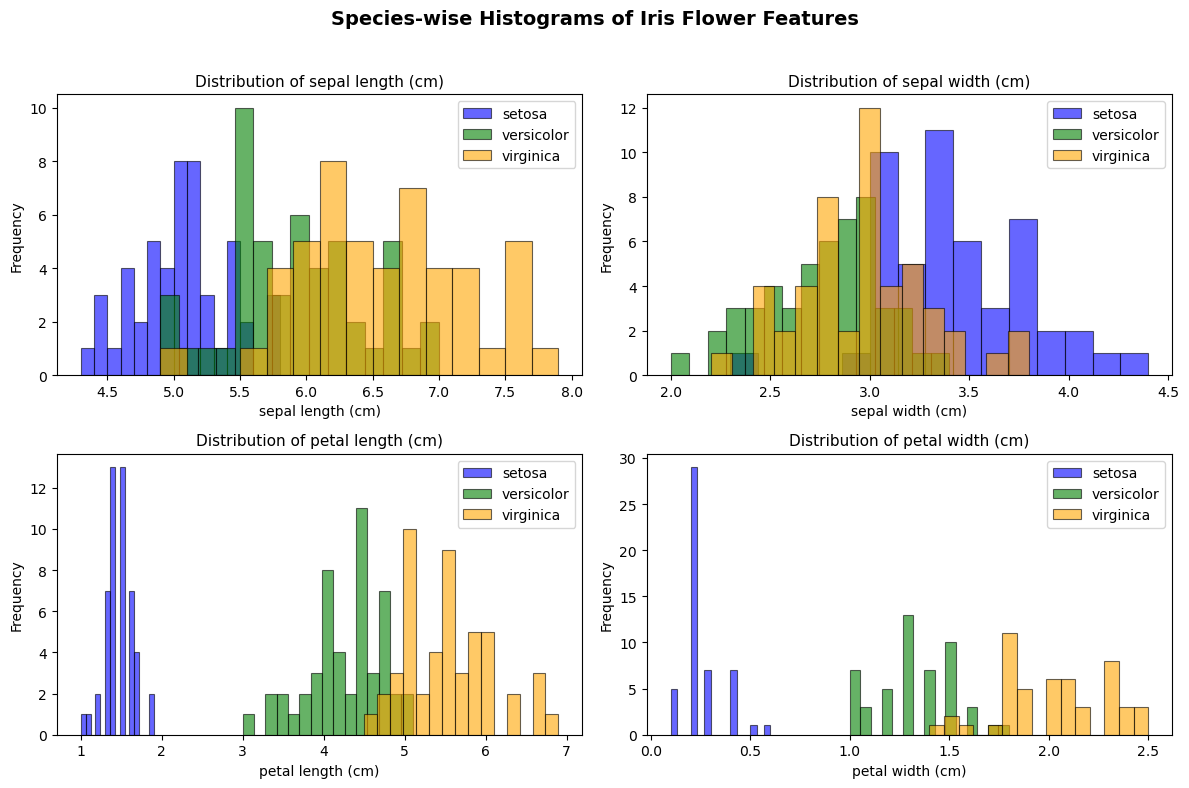

In [13]:
# Define the features to plot
features = iris.feature_names
species = df['species'].unique()
colors = ['blue', 'green', 'orange']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features):
    for sp, color in zip(species, colors):
        subset = df[df['species'] == sp]
        axes[i].hist(subset[feature],
                     bins=15,
                     alpha=0.6,
                     label=sp,
                     color=color,
                     edgecolor='black',
                     linewidth=0.8)
    axes[i].set_title(f'Distribution of {feature}', fontsize=11)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Adjust layout for better spacing
plt.suptitle('Species-wise Histograms of Iris Flower Features', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

###Density Plot:

A Density Plot, also known as a Kernel Density Estimate (KDE) plot, is a smoothed version of a histogram. It shows the probability density function of a variable, providing a continuous visual representation of the distribution of the data. Density plot can be plotted using seaborn library

<Axes: ylabel='Density'>

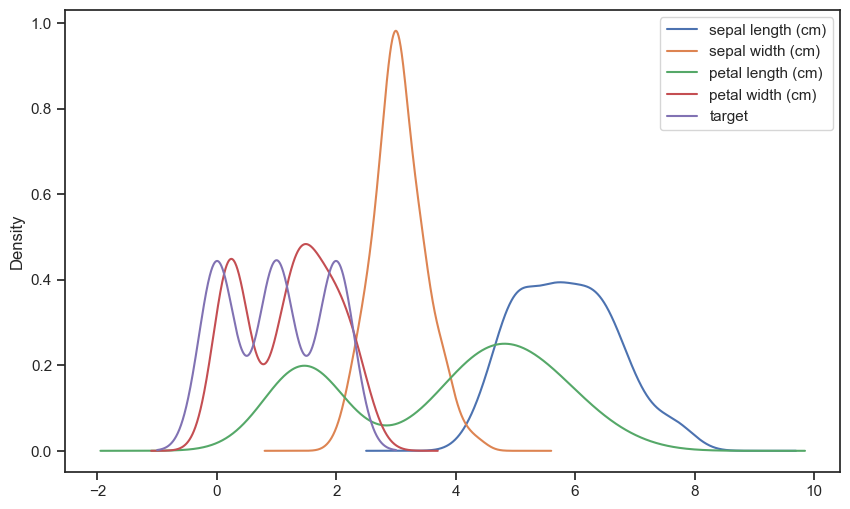

In [133]:
#Plot density Plot of all numerical data
df.plot(kind = "density", figsize=(10,6))

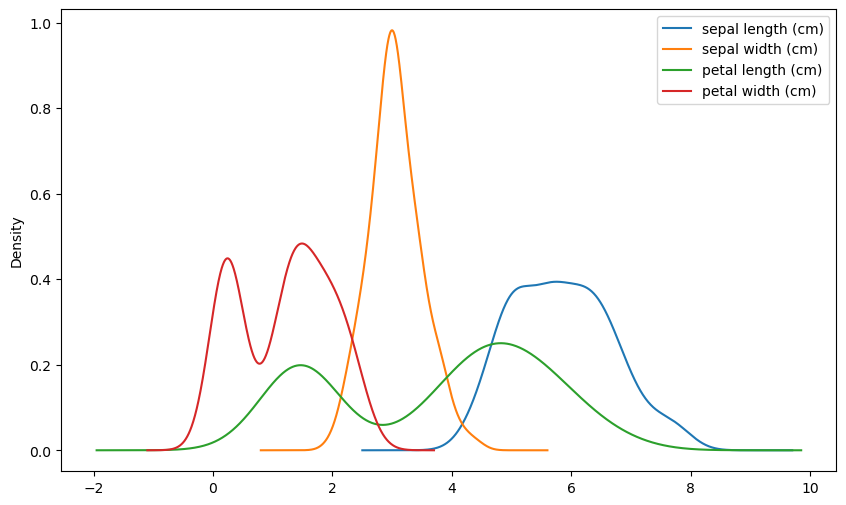

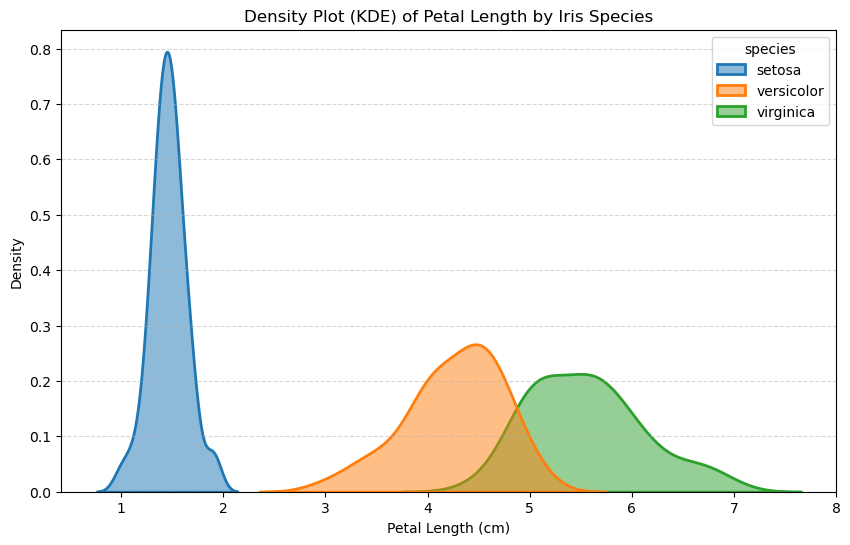

In [15]:
# --- Density Plot (KDE Plot) Generation ---
#Import sns library
import seaborn as sns

#Set Figure Size
plt.figure(figsize=(10, 6))

# Use Seaborn's kdeplot.
# 'hue' separates the distributions by species.
# 'fill=True' colors the area under the curve.
sns.kdeplot(data=df,
            x='petal length (cm)',
            hue='species',
            fill=True,
            alpha=0.5,
            linewidth=2)

plt.title('Density Plot (KDE) of Petal Length by Iris Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Species-wise Histogram with KDE Curves — Iris Dataset

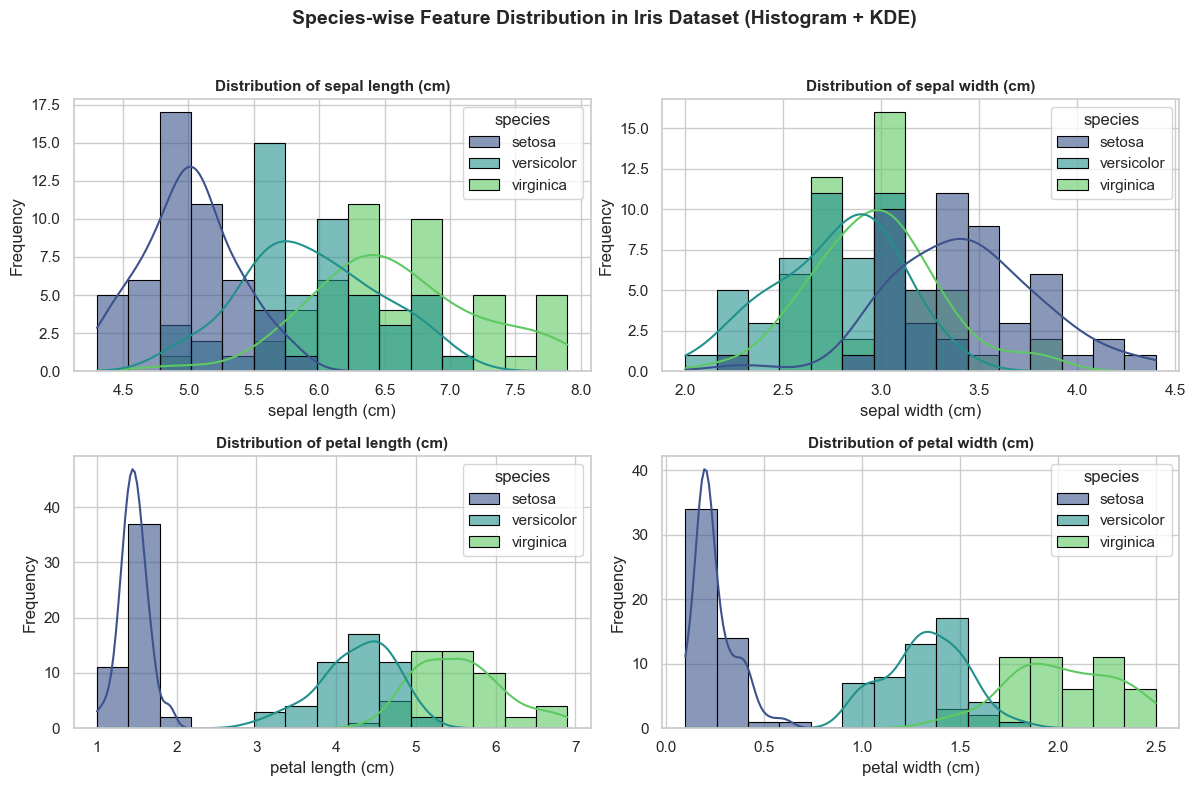

In [16]:
# --- Species-wise Histogram with KDE Curves using Seaborn & Matplotlib ---
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create subplots for all features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot histogram + KDE for each feature
for i, feature in enumerate(features):
    sns.histplot(
        data=df,
        x=feature,
        hue='species',        # Color separation by species
        kde=True,             # Overlay KDE curves
        bins=15,
        palette='viridis',    # Attractive, colorblind-friendly palette
        alpha=0.6,
        ax=axes[i],
        edgecolor='black',
        linewidth=0.8
    )
    axes[i].set_title(f'Distribution of {feature}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout and title
plt.suptitle('Species-wise Feature Distribution in Iris Dataset (Histogram + KDE)',
             fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()

###6) Visualize trend of Single Variable - Line Plot

Goal: inspect trend of data

A line plot isn't typically used to show relationships between features for this kind of dataset, but it can be used to visualize the value of a single feature (Petal Length) across the order of the samples in the dataset, colored by species.

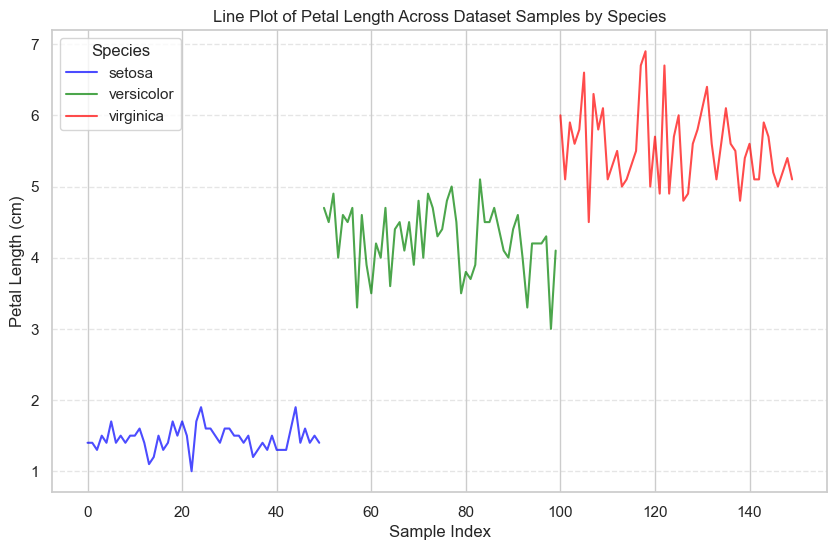

In [17]:
# --- Line Plot Code ---
plt.figure(figsize=(10, 6))

species_colors = {'setosa': 'blue', 'versicolor': 'green', 'virginica': 'red'}

for species_name, color in species_colors.items():
    # Filter data for the current species
    species_data = df[df['species'] == species_name]

    # Plot Petal Length against its original index (sample order)
    plt.plot(species_data.index, species_data['petal length (cm)'],
             label=species_name,
             color=color,
             alpha=0.7,
             linestyle='-')

plt.title('Line Plot of Petal Length Across Dataset Samples by Species')
plt.xlabel('Sample Index')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Save the plot
plt.savefig('iris_line_plot.png')
plt.show()

In [18]:
# default plot is a line chart
fig = plt.figure(figsize=(10, 6))

ax = df.plot() # assign to variable ax

# Use ax to add titles and labels
ax.set_title("Iris Dataset")
ax.set_xlabel("Data Points")
ax.set_ylabel("Length/Width (mm)")


Text(0, 0.5, 'Length/Width (mm)')

<Figure size 1000x600 with 0 Axes>

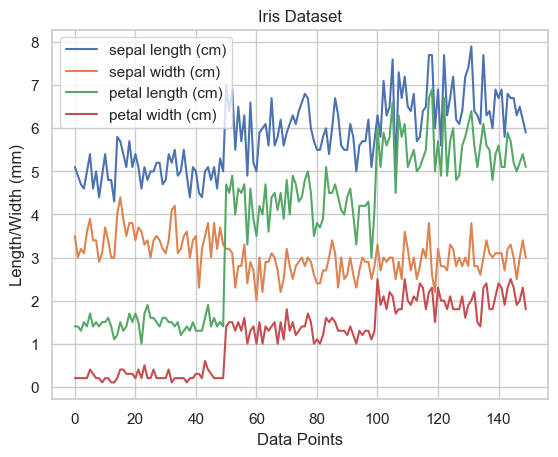

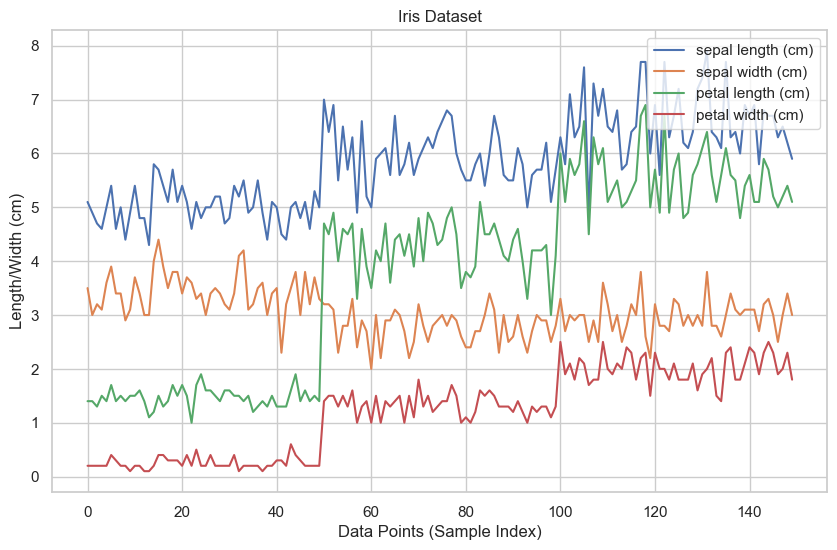

In [19]:
#Add details to the line plot
# 1. Create the Figure and Axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# 2. Iterate through columns and plot each one as a line
# Pandas plot() automatically uses the DataFrame index (0 to 149) for the x-axis.
for column in df.columns[:-1]:  # Exclude the 'species' column
    ax.plot(df.index, df[column], label=column)

# 3. Add titles and labels using the axes object
ax.set_title("Iris Dataset")
ax.set_xlabel("Data Points (Sample Index)")
ax.set_ylabel("Length/Width (cm)") # Corrected unit from 'mm' to 'cm' for Iris data

# 4. Add a legend to distinguish the lines
ax.legend(loc='upper right')

# 5. Display the plot
plt.show()

###7) Two-variable relationship — scatter plot

Goal: inspect relationship between sepal_length and sepal_width.

A scatter plot is excellent for visualizing the distribution and separation of the three species based on two features. Let's plot sepal length vs. sepal width.

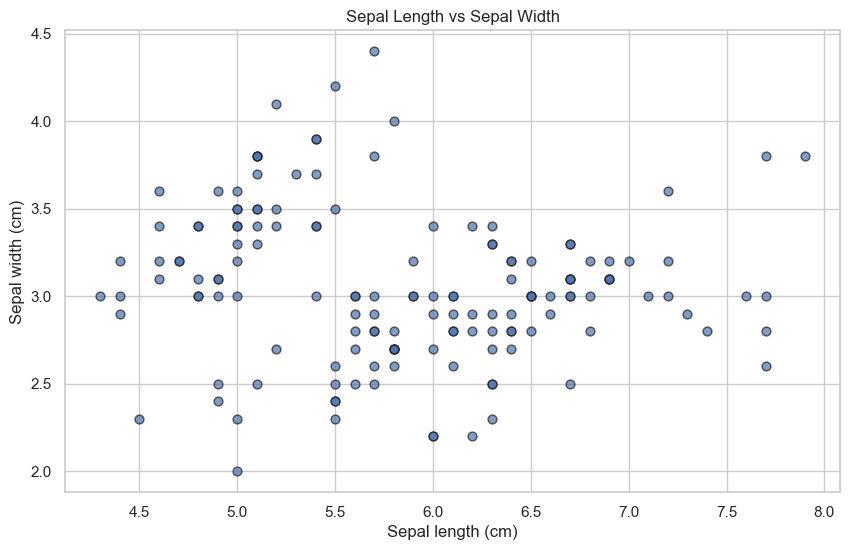

In [20]:
#Scatterplot of sepal length to sepal width
plt.figure(figsize=(10,6))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], s=40, edgecolors='k', alpha=0.7)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

#Similarly we can plot scatterplot of petal length to petal width

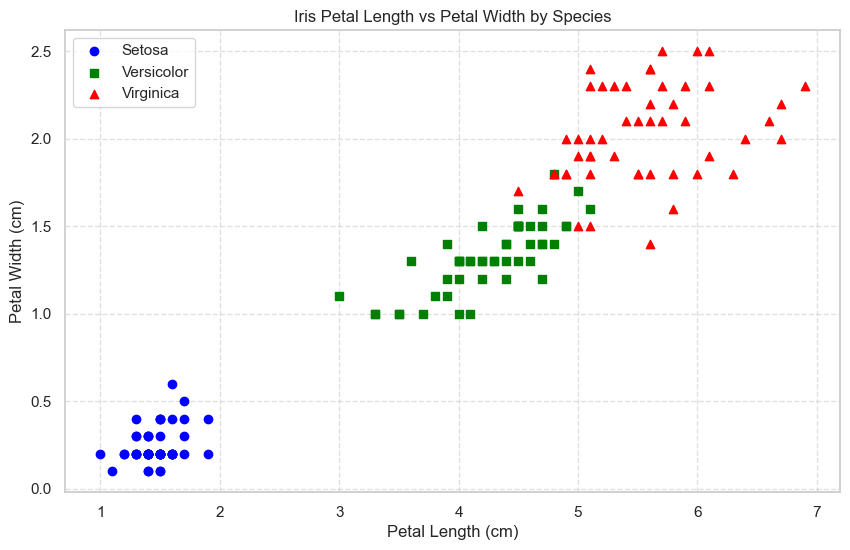

In [21]:
# We use plt.subplots() to create a figure and a set of axes, which gives us more control over the plot elements.
#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for each species
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'],
           label='Setosa', marker='o', color='blue')
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'],
           label='Versicolor', marker='s', color='green') # 's' is a square marker
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'],
           label='Virginica', marker='^', color='red') # '^' is a triangle marker

# Set plot title and labels
ax.set_title('Iris Petal Length vs Petal Width by Species')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')

# Add a legend
ax.legend(loc='upper left')

# Add grid lines for readability
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

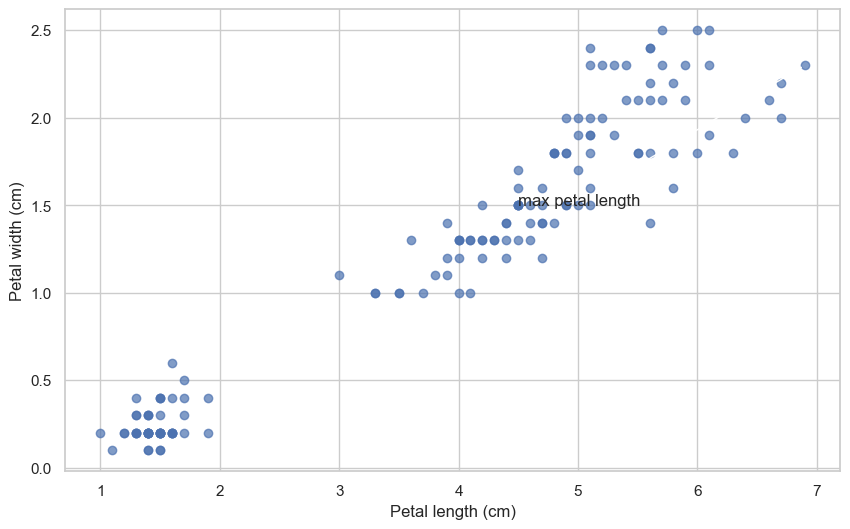

In [22]:
#Annotate interesting points - Max petal length point
#Goal: highlight or label specific datapoints in a scatter.

plt.figure(figsize=(10,6))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], alpha=0.7)
# Annotate the max petal_length point
idx = df['petal length (cm)'].idxmax()
plt.annotate('max petal length',
             xy=(df.loc[idx,'petal length (cm)'], df.loc[idx,'petal width (cm)']),
             xytext=(4.5, 1.5),
             arrowprops=dict(arrowstyle='->'))
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()


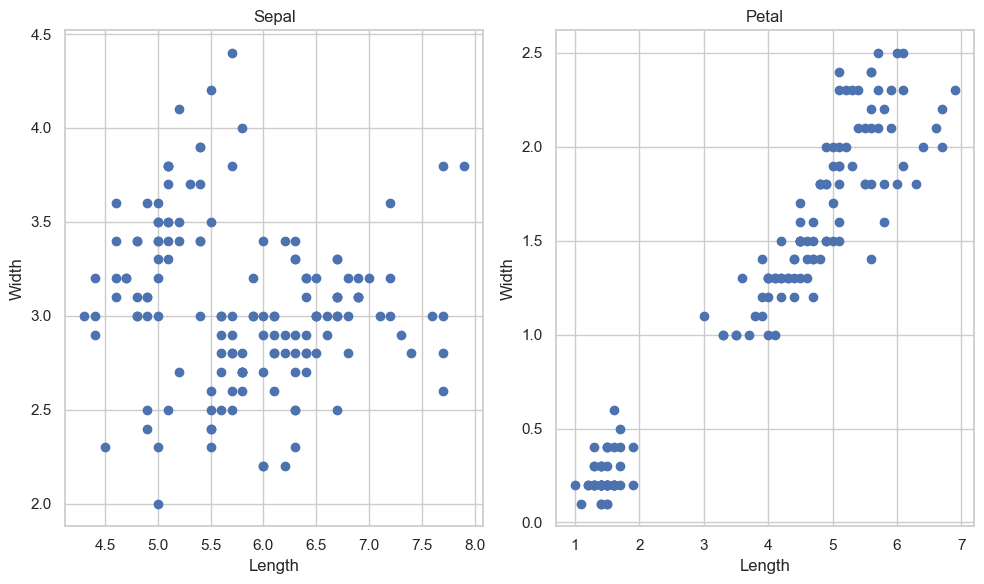

In [23]:
#Multi-panel figure (combine plots)
#Goal: put related plots side-by-side for comparison

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].scatter(df['sepal length (cm)'], df['sepal width (cm)'])
ax[0].set_title('Sepal')
ax[0].set_xlabel('Length'); ax[0].set_ylabel('Width')

ax[1].scatter(df['petal length (cm)'], df['petal width (cm)'])
ax[1].set_title('Petal')
ax[1].set_xlabel('Length'); ax[1].set_ylabel('Width')

plt.tight_layout()
plt.show()


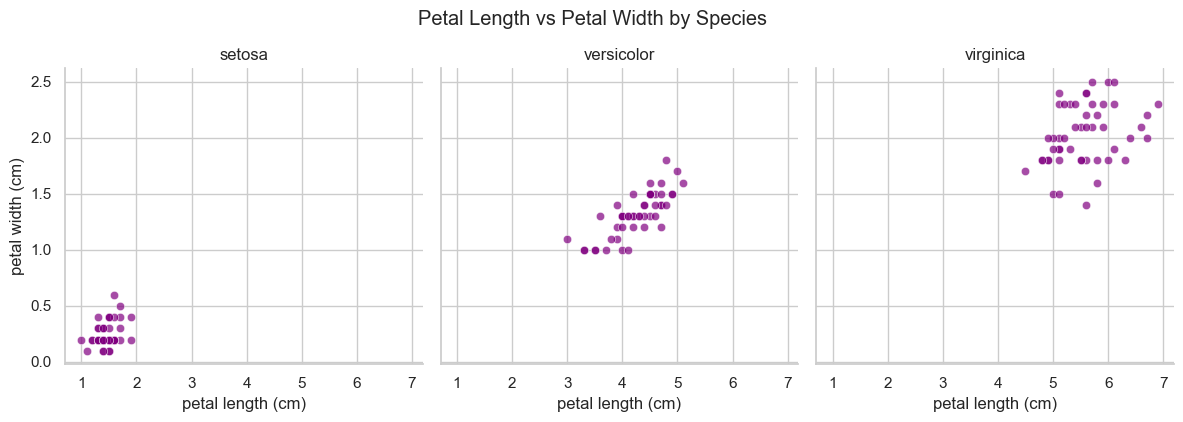

In [24]:
# Combine multiple comparisons using FacetGrid - seaborn library
g = sns.FacetGrid(df, col='species', height=4)
g.map_dataframe(sns.scatterplot, x='petal length (cm)', y='petal width (cm)', color='purple', alpha=0.7)
g.set_titles('{col_name}')
g.fig.suptitle('Petal Length vs Petal Width by Species', y=1.05)
plt.show()

####Combined Histogram and Scatter Plot
Let us generate combined Histogram and Scatter Plot

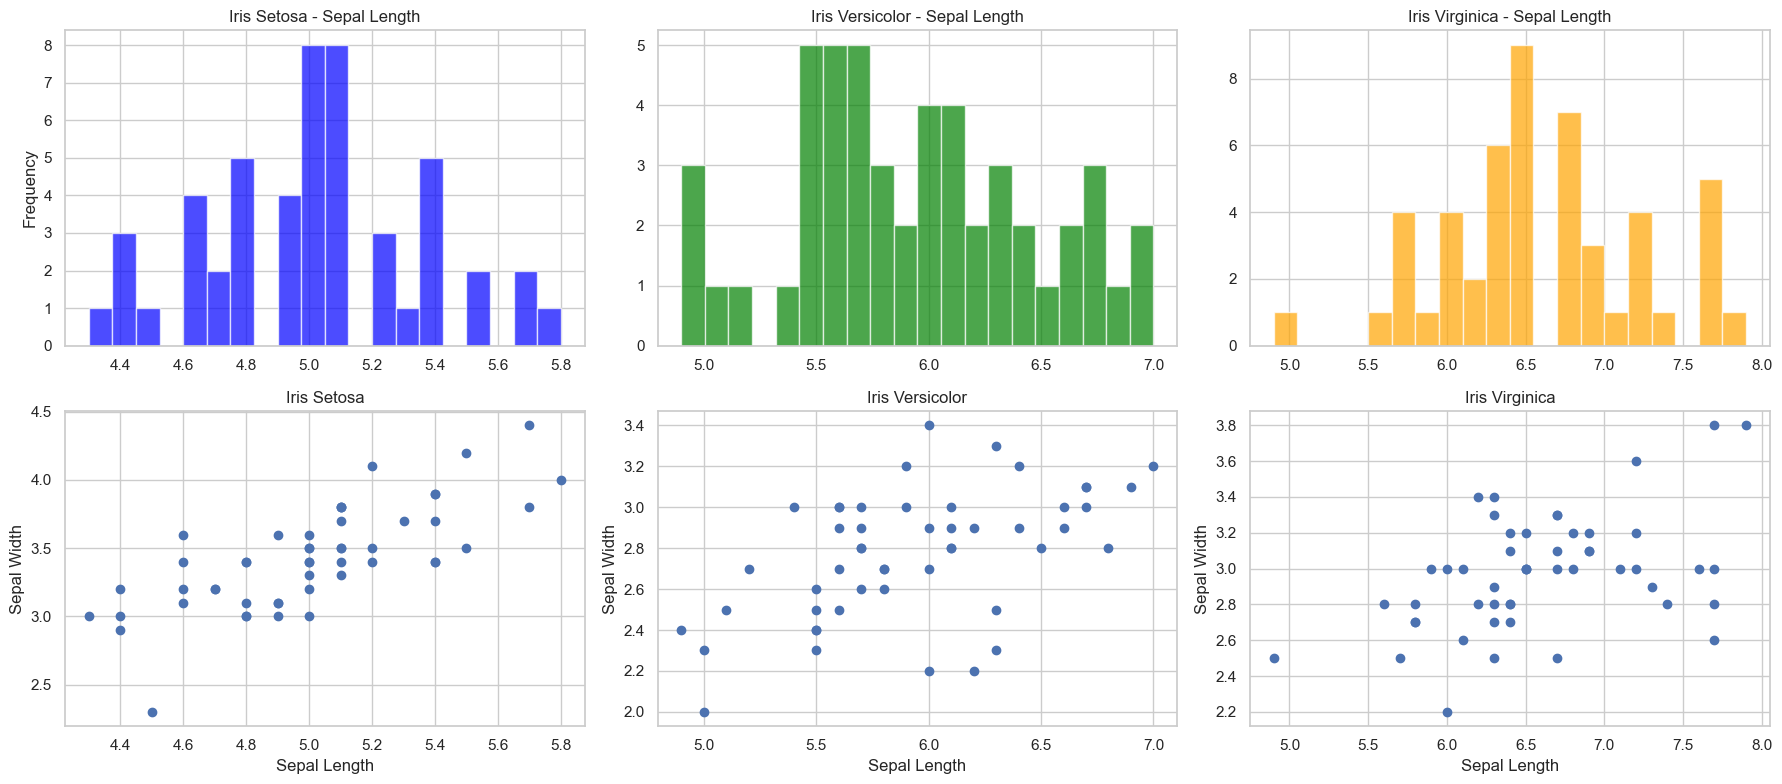

In [25]:
# Subplots of the three species: setosa, virginica, and versicolor
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))

# First row of charts - histograms
axes[0,0].hist(setosa["sepal length (cm)"], bins=20, color='blue', alpha=0.7)
axes[0,0].set_title('Iris Setosa - Sepal Length')
axes[0,0].set_ylabel('Frequency')

axes[0,1].hist(versicolor["sepal length (cm)"], bins=20, color='green', alpha=0.7)
axes[0,1].set_title('Iris Versicolor - Sepal Length')

axes[0,2].hist(virginica["sepal length (cm)"], bins=20, color='orange', alpha=0.7)
axes[0,2].set_title('Iris Virginica - Sepal Length')

# Second row of charts - scatter plots
axes[1,0].scatter(setosa["sepal length (cm)"], setosa["sepal width (cm)"])
axes[1,0].set_title('Iris Setosa')
axes[1,0].set_xlabel('Sepal Length')
axes[1,0].set_ylabel('Sepal Width')

axes[1,1].scatter(versicolor["sepal length (cm)"], versicolor["sepal width (cm)"])
axes[1,1].set_title('Iris Versicolor')
axes[1,1].set_xlabel('Sepal Length')
axes[1,1].set_ylabel('Sepal Width')

axes[1,2].scatter(virginica["sepal length (cm)"], virginica["sepal width (cm)"])
axes[1,2].set_title('Iris Virginica')
axes[1,2].set_xlabel('Sepal Length')
axes[1,2].set_ylabel('Sepal Width')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

###8) Box Plots for Feature Comparison
Goal: compare distributions across species for a single feature.

Box plots (or box-and-whisker plots) are excellent for visualizing the distribution, central tendency (median), and variability (IQR) of a numerical feature for each categorical group. We can use them to compare the features across the three Iris species.

<Figure size 1000x600 with 0 Axes>

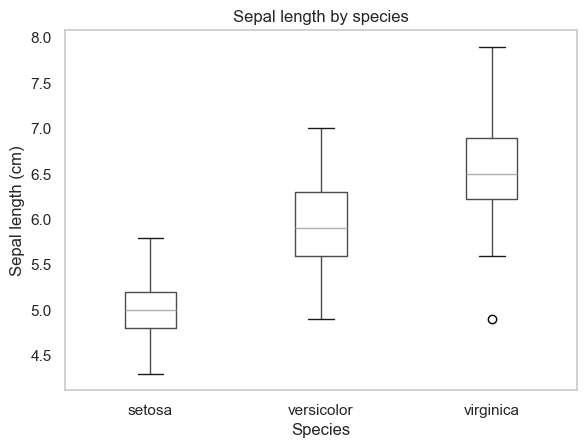

In [26]:
plt.figure(figsize=(10,6))
df.boxplot(column='sepal length (cm)', by='species', grid=False)
plt.title('Sepal length by species')
plt.suptitle('')   # remove automatic subtitle
plt.xlabel('Species')
plt.ylabel('Sepal length (cm)')
plt.show()


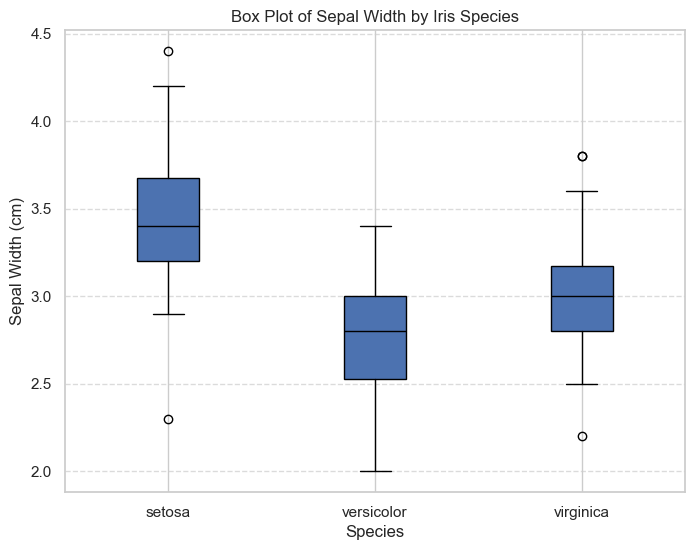

In [27]:
# Box Plot of Sepal Width by Species (using Matplotlib raw)
# 1. Prepare data for plotting
# Create a list of sepal width data, grouped by species
sepal_width_data = [
    df[df['species'] == 'setosa']['sepal width (cm)'],
    df[df['species'] == 'versicolor']['sepal width (cm)'],
    df[df['species'] == 'virginica']['sepal width (cm)']
]

# 2. Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# The boxplot function takes a list of arrays (one for each box)
ax.boxplot(sepal_width_data, patch_artist=True,  # Fill boxes with color
           medianprops={'color': 'black'})     # Style the median line

# 3. Customize the plot
ax.set_xticklabels(df['species'].unique())
ax.set_title('Box Plot of Sepal Width by Iris Species')
ax.set_xlabel('Species')
ax.set_ylabel('Sepal Width (cm)')
ax.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

# Display the plot
plt.show()


Observation: A box plot clearly shows that Iris-setosa generally has a larger sepal width compared to the other two species, with its box positioned higher on the y-axis.

###9) Violin Plot (Alternative to BoxPlot)
Goal: show KDE + distribution shape per species

The violin plot visualizes the distribution of Petal Length for each species, combining the information of a box plot with a kernel density estimate.

Here we shall be using (matplotlib via seaborn).

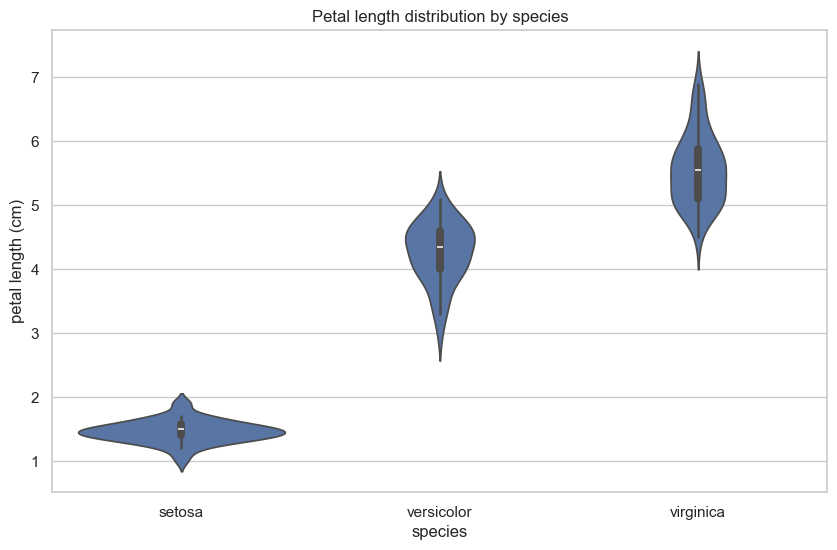

In [28]:
import seaborn as sns
# Generating Violin Plot (basic)
plt.figure(figsize=(10,6))
sns.violinplot(x='species', y='petal length (cm)', data=df)
plt.title('Petal length distribution by species')
plt.show()



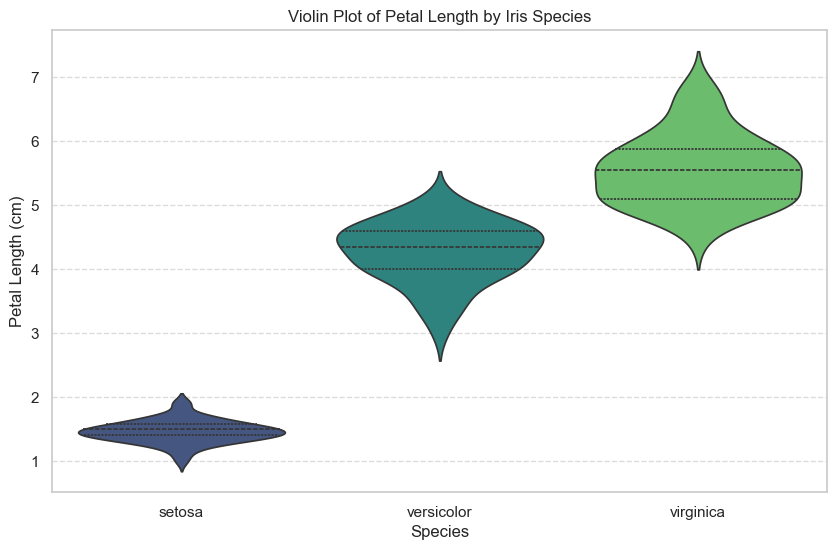

In [29]:
#Generating Violin Plot with better visualization
plt.figure(figsize=(10, 6))

# Generate the Violin Plot for Petal Length by Species
sns.violinplot(
    x='species',
    y='petal length (cm)',
    hue='species',
    data=df,
    inner='quartile', # Displays the quartiles (25th, 50th/median, 75th percentile)
    palette='viridis' # Color palette
)

plt.title('Violin Plot of Petal Length by Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Violin Plot: Petal Length Distribution

The violin plot visualizes the distribution of Petal Length for each species, combining the information of a box plot with a kernel density estimate.

Setosa (Blue): Shows a very tight, narrow distribution with small petal lengths.

Versicolor (Green): Exhibits a wider, more spread-out distribution in the middle range.

Virginica (Yellow): Has the largest petal lengths, with a distribution that is also relatively wide.

The plot shows the stark separation of the three species based on petal length, which is a strong feature for classification.

###Grouped Violin Plot
Petal Length and Width and Sepal Length and Width can be plotted together for better visualization.

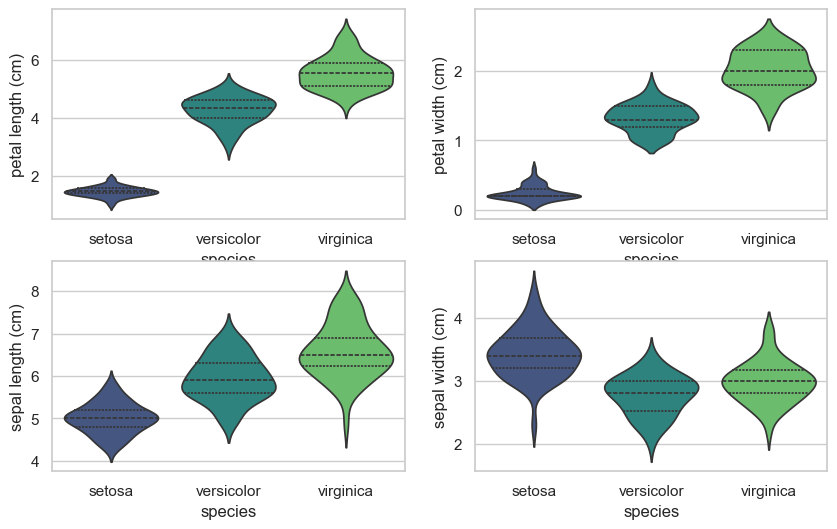

In [30]:
# The violinplot shows density of the length and width in the species
# Denser regions of the data are fatter, and sparser thiner in a violin plot
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.violinplot(x='species', y='petal length (cm)', hue='species', data=df, inner='quartile', palette='viridis')
plt.subplot(2,2,2)
sns.violinplot(x='species', y='petal width (cm)', hue='species', data=df, inner='quartile', palette='viridis')
plt.subplot(2,2,3)
sns.violinplot(x='species', y='sepal length (cm)', hue='species', data=df, inner='quartile', palette='viridis' )
plt.subplot(2,2,4)
sns.violinplot(x='species', y='sepal width (cm)', hue='species', data=df, inner='quartile', palette='viridis' )

plt.show()

***Violin Plot:*** Petal Length Distribution

The violin plot visualizes the distribution of Petal Length for each species, combining the information of a box plot with a kernel density estimate.

Setosa (Blue): Shows a very tight, narrow distribution with small petal lengths.

Versicolor (Green): Exhibits a wider, more spread-out distribution in the middle range.

Virginica (Yellow): Has the largest petal lengths, with a distribution that is also relatively wide.

The plot shows the stark separation of the three species based on petal length, which is a strong feature for classification.

###10) Bar Chart for Mean Feature Values
Goal: Display Mean Value Features

A bar chart can effectively compare the average (mean) value of a feature across the different species.

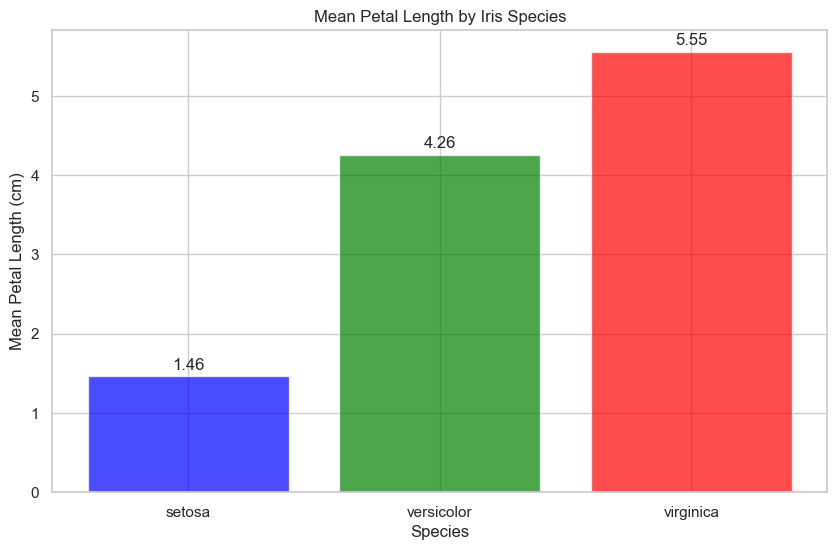

In [31]:
# 1. Calculate the mean petal length for each species
mean_petal_length = df.groupby('species')['petal length (cm)'].mean()

# 2. Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# The bar function is used to create the bar chart
# x-axis are the species names, y-axis are the mean values
bars = ax.bar(mean_petal_length.index, mean_petal_length.values, color=['blue', 'green', 'red'], alpha=0.7)

# 3. Customize the plot
ax.set_title('Mean Petal Length by Iris Species')
ax.set_xlabel('Species')
ax.set_ylabel('Mean Petal Length (cm)')

# Optional: Add the mean value on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.2f}',
            ha='center', va='bottom')

# Display the plot
plt.show()

Observation: The bar chart visually confirms that the species are well-separated based on this feature, with Iris-virginica having the largest mean petal length and Iris-setosa the smallest.

###11) Pie Diagram

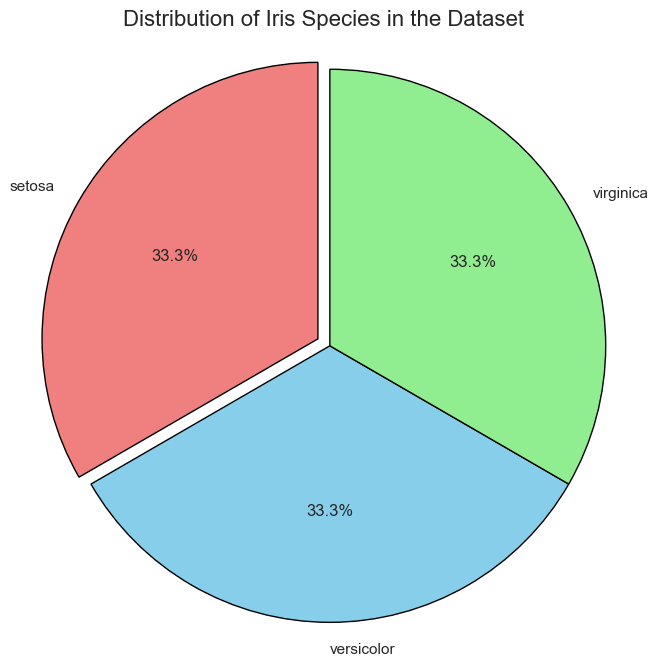

In [32]:
# 1. Calculate the count of each species
species_counts = df['species'].value_counts()

# 2. Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# The pie function takes the values and labels
ax.pie(species_counts.values,
       labels=species_counts.index,
       autopct='%1.1f%%', # Display percentages
       startangle=90,
       colors=['lightcoral', 'skyblue', 'lightgreen'],
       explode=(0.05, 0, 0), # Explode the first slice (Setosa)
       wedgeprops={'edgecolor': 'black', 'linewidth': 1}
      )

# Set the title
ax.set_title('Distribution of Iris Species in the Dataset', fontsize=16)

# Ensure the pie chart is circular
ax.axis('equal')

plt.show()

###12) Donut Diagram
A Donut Chart is a variation of the pie chart that shows the relationship of parts to a whole but with a blank center. It is often considered aesthetically cleaner than a standard pie chart.

The Donut Chart illustrating the balanced distribution of the three Iris species in the dataset has been created.

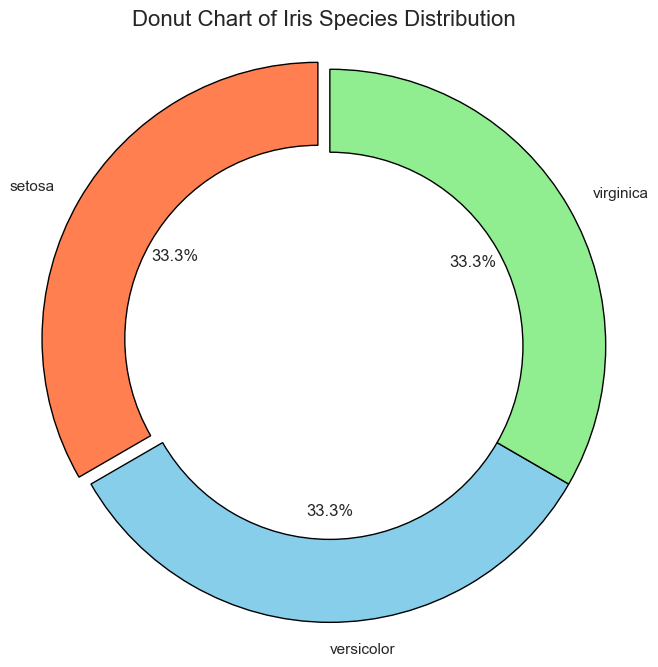

In [ ]:
# --- Donut Chart Diagram ---

# 1. Calculate the count of each species
species_counts = df['species'].value_counts()

# 2. Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Define the properties for the donut hole (width determines the thickness of the ring)
donut_properties = {'width': 0.3, 'edgecolor': 'black', 'linewidth': 1}

# The pie function creates the segments
ax.pie(species_counts.values,
       labels=species_counts.index,
       autopct='%1.1f%%',       # Display percentages
       startangle=90,
       colors=['coral', 'skyblue', 'lightgreen'],
       explode=(0.05, 0, 0),     # Explode the first slice for emphasis
       wedgeprops=donut_properties # Creates the donut hole
      )

# Set the title
ax.set_title('Donut Chart of Iris Species Distribution', fontsize=16)

# Ensure the chart is circular
ax.axis('equal')

plt.show()


###13) Correlation heatmap (feature correlation)

Goal: spot strongly/weakly correlated numeric features.

The heatmap displays the pairwise Pearson correlation coefficient for all four numerical features in the dataset. Values close to $1$ (red) indicate a strong positive correlation, while values close to $-1$ (blue) indicate a strong negative correlation.

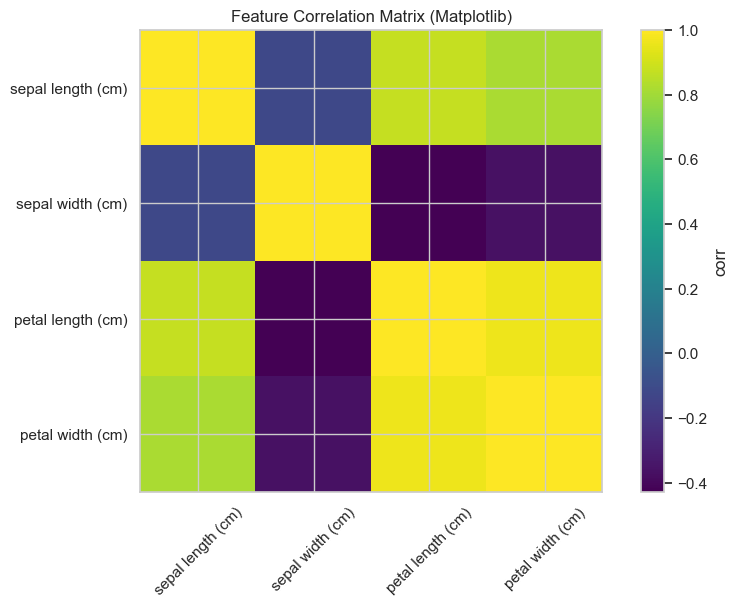

In [34]:
corr = df.iloc[:, :-1].corr()   # drop species
plt.figure(figsize=(10,6))
plt.imshow(corr, cmap='viridis', interpolation='nearest')
plt.colorbar(label='corr')
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Feature Correlation Matrix (Matplotlib)')
plt.show()



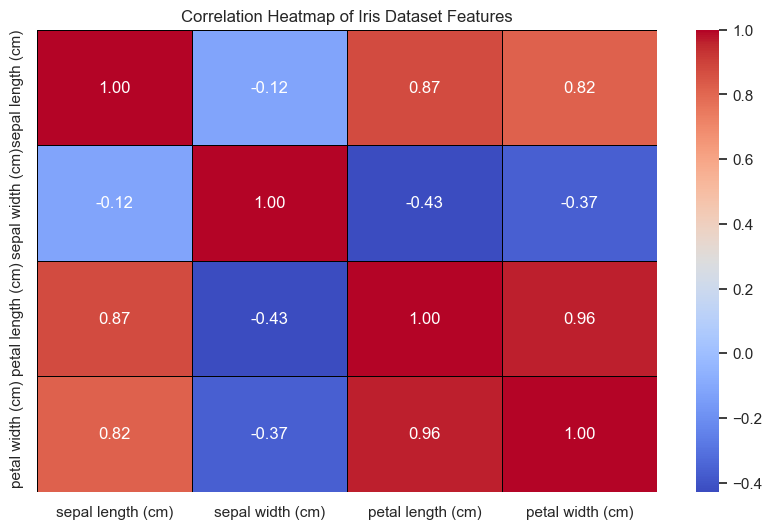

In [35]:
# Correlation Heatmap (using Seaborn)
# Select only the numeric features for correlation calculation
numeric_df = df.drop(columns=['species'])
correlation_matrix = numeric_df.corr()

# Create the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,     # Display the correlation values on the map
    cmap='coolwarm', # Color scheme: cool for negative, warm for positive
    fmt=".2f",      # Format annotations to two decimal places
    linewidths=.5,
    linecolor='black'
)
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()

###14) Save Figures
Goal: export a plot to PNG (or PDF/SVG).

To save the plots we generated earlier (Scatter Plot, Histogram, Box Plot, Violin Plot, and Heatmap) using Matplotlib's plt.savefig() function.

You simply replace plt.show() with plt.savefig('your_filename.png') within your plotting code blocks.

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], s=40, edgecolors='k', alpha=0.7)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.savefig('iris_petal_scatter.png', dpi=300, bbox_inches='tight')
plt.close()   # close when running scripts


####Combined Code for printing all graphs in one go

In [37]:
# =======================================================
## 1. Scatter Plot (Petal Length vs. Petal Width)
# =======================================================
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label='Setosa', marker='o', color='blue')
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label='Versicolor', marker='s', color='green')
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label='Virginica', marker='^', color='red')
ax.set_title('Iris Petal Length vs Petal Width by Species')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.6)

# Save the plot
plt.savefig('iris_scatter_plot.png')
plt.close(fig) # Close the figure to free up memory

# =======================================================
## 2. Histogram (Sepal Length Distribution)
# =======================================================
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(setosa['sepal length (cm)'], bins=10, alpha=0.6, label='Setosa')
plt.hist(versicolor['sepal length (cm)'], bins=10, alpha=0.6, label='Versicolor')
plt.hist(virginica['sepal length (cm)'], bins=10, alpha=0.6, label='Virginica')
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Save the plot
plt.savefig('iris_histogram.png')
plt.close(fig)

# =======================================================
## 3. Box Plot (Sepal Width Comparison)
# =======================================================
sepal_width_data = [
    df[df['species'] == 'setosa']['sepal width (cm)'],
    df[df['species'] == 'versicolor']['sepal width (cm)'],
    df[df['species'] == 'virginica']['sepal width (cm)']
]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(sepal_width_data, patch_artist=True, medianprops={'color': 'black'})
ax.set_xticklabels(df['species'].unique())
ax.set_title('Box Plot of Sepal Width by Iris Species')
ax.set_xlabel('Species')
ax.set_ylabel('Sepal Width (cm)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('iris_box_plot.png')
plt.close(fig)

# =======================================================
## 4. Violin Plot (Petal Length Distribution - using Seaborn)
# =======================================================
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='species', y='petal length (cm)', hue='species', data=df, inner='quartile', palette='viridis', ax=ax)
ax.set_title('Violin Plot of Petal Length by Iris Species')
ax.set_xlabel('Species')
ax.set_ylabel('Petal Length (cm)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('iris_violin_plot.png')
plt.close(fig)

# =======================================================
## 5. Correlation Heatmap (using Seaborn)
# =======================================================
numeric_df = df.drop(columns=['species'])
correlation_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    linecolor='black',
    ax=ax
)
ax.set_title('Correlation Heatmap of Iris Dataset Features')

# Save the plot
plt.savefig('iris_correlation_heatmap.png')
plt.close(fig)

print("All five plots have been saved as PNG files in the current directory.")

All five plots have been saved as PNG files in the current directory.


####Bubble Plot

A bubble plot is essentially a scatter plot where a third variable (and sometimes a fourth) is represented by the size of the marker (bubble).

In this plot:

X-axis: sepal length (cm)

Y-axis: sepal width (cm)

Bubble Size (s): petal length (cm) (scaled up for visibility)

Bubble Color (c): species

This visualization allows you to see how sepal dimensions relate to petal size and species simultaneously.

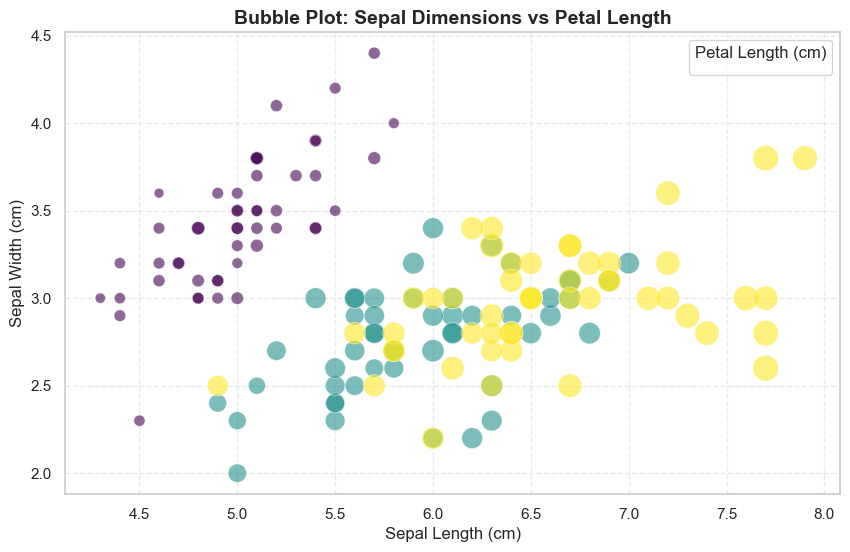

In [38]:
# --- Bubble Plot  ---

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in iris.target]
df['target'] = iris.target  # Color mapping column

#Set Image Size
plt.figure(figsize=(10, 6))

# Create the scatter (bubble) plot
scatter = plt.scatter(
    x=df['sepal length (cm)'],
    y=df['sepal width (cm)'],
    s=df['petal length (cm)'] * 50,   # Bubble size proportional to petal length
    c=df['target'],                   # Color mapped by species target
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Get legend handles and labels
handles, _ = scatter.legend_elements(num=3)
# Add color legend for species
plt.legend(handles, iris.target_names, title="Species", loc="lower left")

# Add size legend for petal length
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=[1, 2, 4, 6])
plt.legend(handles, ['<1 cm', '2 cm', '4 cm', '>6 cm'],
           loc="upper right", title="Petal Length (cm)")

# Add titles and labels
plt.title('Bubble Plot: Sepal Dimensions vs Petal Length', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Save and display the plot
plt.savefig('iris_bubble_plot.png', bbox_inches='tight', dpi=300)
plt.show()


###15) Pair Plot
a Pairplot is one of the most powerful tools for Exploratory Data Analysis (EDA) because it shows both feature distributions and relationships between features, all color-coded by species.

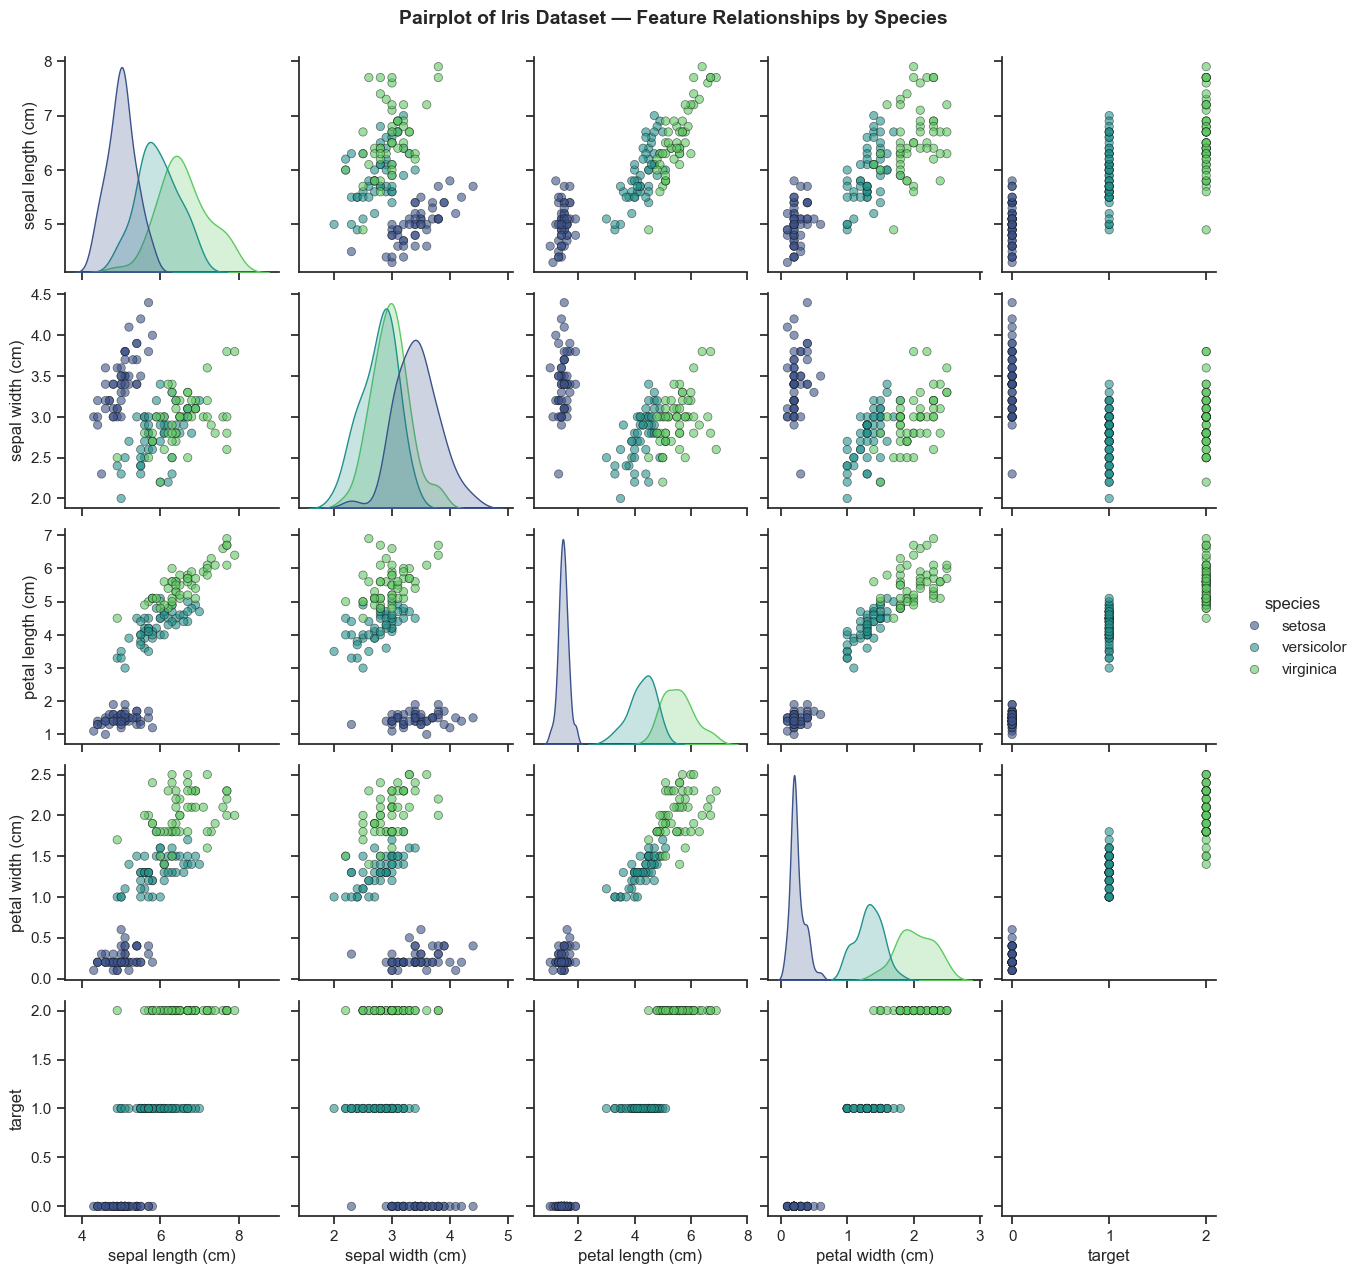

In [39]:
# Set Seaborn theme for clarity and visual appeal
sns.set(style="ticks", color_codes=True)

# Create the Pairplot
pairplot = sns.pairplot(
    df,
    hue='species',              # Color by species
    diag_kind='kde',            # KDE curve on diagonal
    palette='viridis',          # Modern color scheme
    corner=False,               # Show full upper & lower triangles
    plot_kws={'alpha': 0.6, 'edgecolor': 'k', 'linewidth': 0.5}
)

# Add a main title
pairplot.fig.suptitle('Pairplot of Iris Dataset — Feature Relationships by Species',
                      fontsize=14, fontweight='bold', y=1.02)

# Display the plot
plt.show()

###16) 3D Scatter Plot
A 3D Scatter Plot is an excellent way to visualize the relationship between three numerical features and see if the classes (species) are linearly separable in three-dimensional space.

The plot below uses the three most informative features for the Iris dataset:

- X-axis: Petal Length

- Y-axis: Petal Width

- Z-axis: Sepal Length

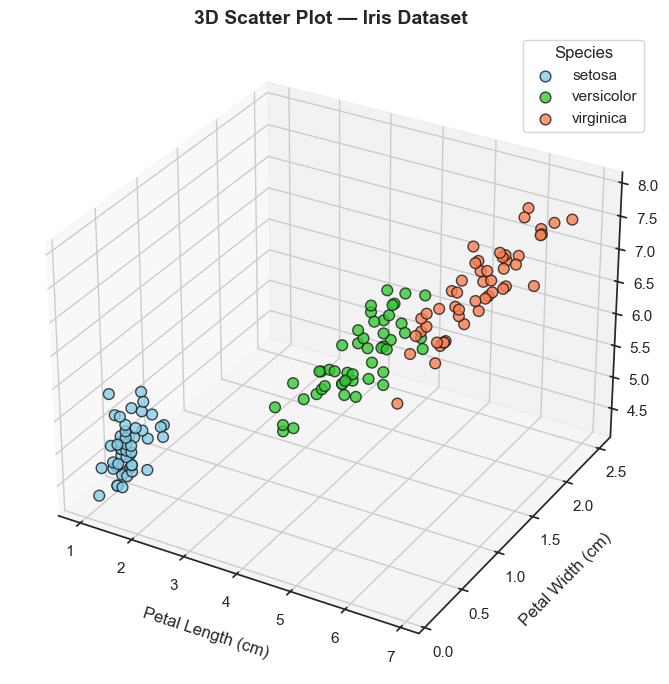

In [40]:
# Define color mapping for each species
colors = {'setosa': 'skyblue', 'versicolor': 'limegreen', 'virginica': 'coral'}

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each species separately
for species, color in colors.items():
    subset = df[df['species'] == species]
    ax.scatter(subset['petal length (cm)'],
               subset['petal width (cm)'],
               subset['sepal length (cm)'],
               label=species,
               color=color,
               s=60,
               edgecolors='k',
               alpha=0.8)

# Set axis labels
ax.set_xlabel('Petal Length (cm)', labelpad=10)
ax.set_ylabel('Petal Width (cm)', labelpad=10)
ax.set_zlabel('Sepal Length (cm)', labelpad=10)
ax.set_title('3D Scatter Plot — Iris Dataset', fontsize=14, fontweight='bold')

# Add legend and grid
ax.legend(title='Species')
ax.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()

###17) Swarm Plot
A Swarm Plot (using Seaborn) is a great way to visualize the distribution of a feature across categories by plotting all individual data points without overlap. It is a good alternative to a box plot or violin plot for small to medium-sized datasets like the Iris dataset, as it shows the actual data points.

C:\Users\jpdob\AppData\Local\Temp\ipykernel_384024\3679724123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


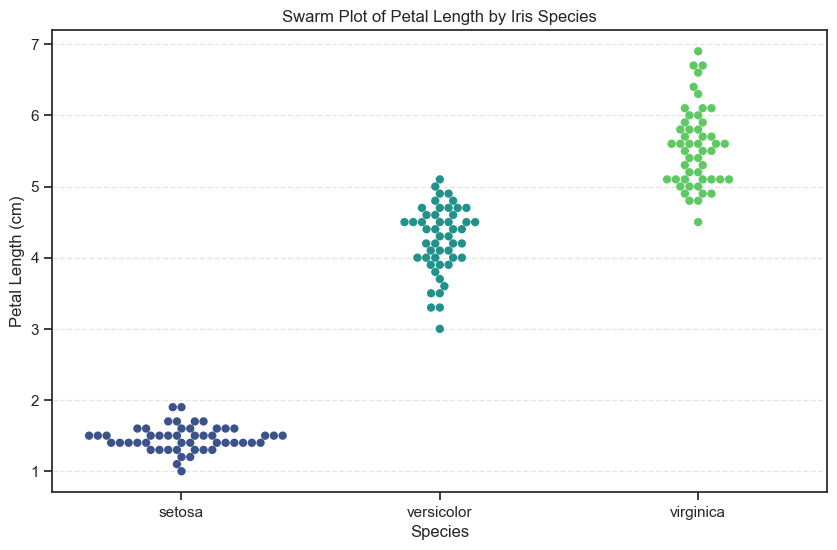

In [41]:
plt.figure(figsize=(10, 6))

# Generate the swarm plot
sns.swarmplot(
    x='species',
    y='petal length (cm)',
    data=df,
    palette='viridis',
    size=6
)

plt.title('Swarm Plot of Petal Length by Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

###18)Radar Plot
A Radar Plot (or Spider Chart) is an effective way to compare multiple quantitative variables across different categories. For the Iris dataset, it is used here to compare the average measurements of all four features for each of the three species.

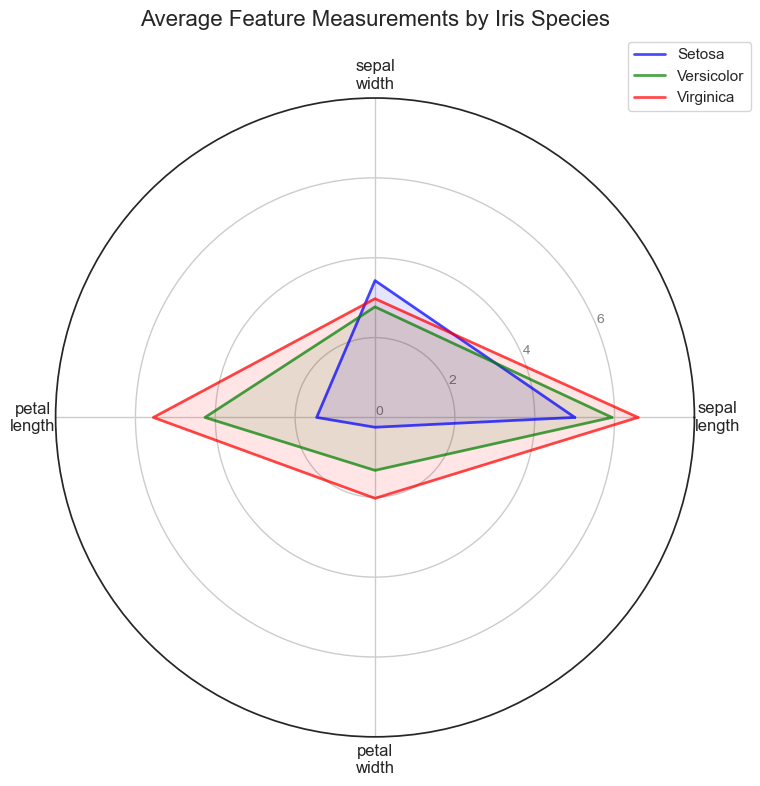

In [53]:
# --- Radar (Spider) Plot for Iris Dataset using Matplotlib ---

df['species'] = [iris.target_names[i] for i in iris.target]

# --- Data Aggregation ---
# Calculate the mean of each feature for each species
df_avg = df.groupby('species')[df.columns[:-1]].mean().reset_index()

# Extract feature names and mean values for each species
features = df.columns[:-1]
setosa_data = df_avg.loc[df_avg['species'] == 'setosa', features].values.flatten()
versicolor_data = df_avg.loc[df_avg['species'] == 'versicolor', features].values.flatten()
virginica_data = df_avg.loc[df_avg['species'] == 'virginica', features].values.flatten()

# --- Radar Plot Setup ---
N = len(features)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# Close the data circle as well
setosa_data = np.concatenate((setosa_data, [setosa_data[0]]))
versicolor_data = np.concatenate((versicolor_data, [versicolor_data[0]]))
virginica_data = np.concatenate((virginica_data, [virginica_data[0]]))

# --- Plotting ---
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot and fill for each species
ax.plot(angles, setosa_data, linewidth=2, linestyle='solid', label='Setosa', color='blue', alpha=0.7)
ax.fill(angles, setosa_data, color='blue', alpha=0.1)

ax.plot(angles, versicolor_data, linewidth=2, linestyle='solid', label='Versicolor', color='green', alpha=0.7)
ax.fill(angles, versicolor_data, color='green', alpha=0.1)

ax.plot(angles, virginica_data, linewidth=2, linestyle='solid', label='Virginica', color='red', alpha=0.7)
ax.fill(angles, virginica_data, color='red', alpha=0.1)

# Set axis labels
feature_labels = [f.replace(' (cm)', '').replace(' ', '\n') for f in features]
ax.set_xticks(angles[:-1])
ax.set_xticklabels(feature_labels, fontsize=12)

# Set radial axis range and ticks
ax.set_yticks(np.arange(0, 8, 2))
ax.set_ylim(0, 8)
ax.set_yticklabels([str(i) for i in np.arange(0, 8, 2)], color="gray", size=10)

# Add title and legend
ax.set_title('Average Feature Measurements by Iris Species', size=16, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
plt.show()


###19) Joint Plot
Joint Plot: Detailed Bivariate Relationship
A Joint Plot combines a bivariate plot (scatter or KDE) with univariate plots (histograms or KDEs) on the margins, giving a focused, detailed look at two variables.

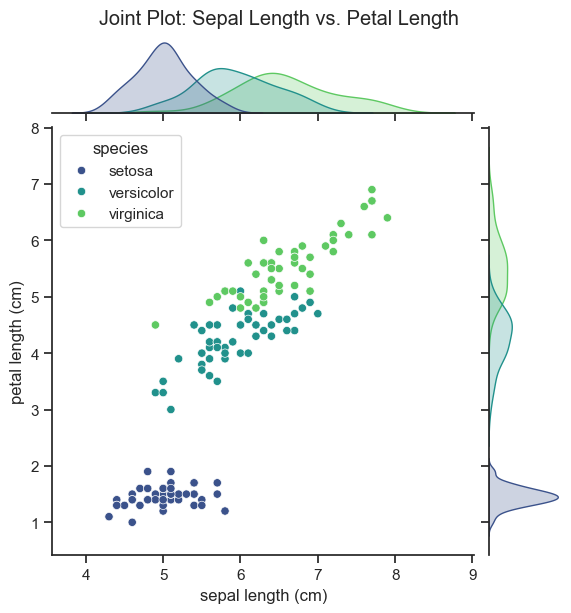

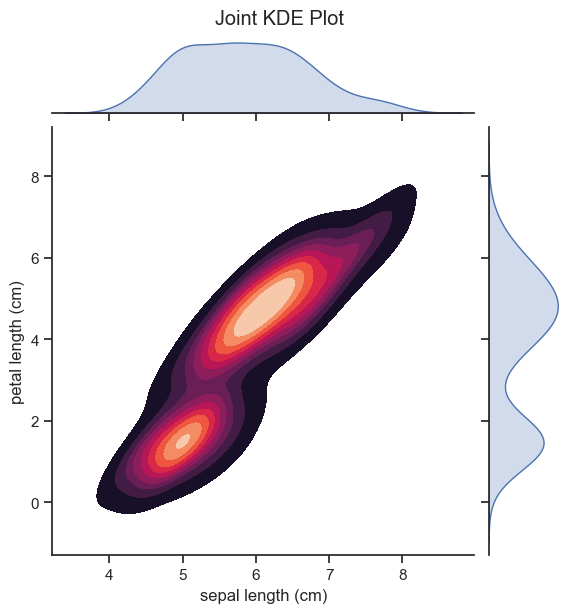

In [ ]:
# Use 'kind="scatter"' for a scatter plot with marginal histograms
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=df, hue='species', kind='scatter', palette='viridis')
plt.suptitle('Joint Plot: Sepal Length vs. Petal Length', y=1.02)
plt.show()

# Use 'kind="kde"' for a 2D density plot with marginal KDEs
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=df, kind='kde', fill=True, cmap='rocket')
plt.suptitle('Joint KDE Plot', y=1.02)
plt.show()

Summary of the Matplotlib and Seaborn library functions

| Visualization Type	| Matplotlib Function	| Seaborn Replacement |
| --- | --- | --- |
| Histogram	| plt.hist()	| sns.histplot() |
| Density Plot (KDE) |	Manual plt.plot() |	sns.kdeplot() |
| Line Plot	| plt.plot()	| sns.lineplot() |
| Scatter Plot |	plt.scatter()	| sns.scatterplot() |
| Box Plot | plt.boxplot()	| sns.boxplot() |
| Violin Plot	| —	| sns.violinplot()
| Correlation Matrix	| plt.imshow()	| sns.heatmap()
| Subplots	| plt.subplots() |	sns.FacetGrid() |
| Bubble Plot	| manual plt.scatter() |	sns.scatterplot(size=...) |